In [ ]:
import numpy as np
from operator import itemgetter

Здесь различные функции растояния между точками

In [ ]:
def euc_dist(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
def abs_dist(x1, x2):
  return np.sum((np.abs(x1-x2)))

Класс, релизующий KNN. Для каждого вектора в test-выборке считаем расстояние до всех объектов в train-выборке.
Выбираем K самых популряных и считаем вектор вероятностей принадлежности обхекта к кажлому из классов.

In [ ]:
class KNN:
  def __init__(self, K=3):
    self.K = K
  
  def fit(self, x_train, y_train):
    self.X_train = x_train
    self.Y_train = y_train

  def predict(self, X_test, distf):
    predictions = [] 
    for i in range(len(X_test)):
      dist = np.array([distf(X_test[i], x_t) for x_t in self.X_train])
      dist_sorted = dist.argsort()[:self.K]
      neigh_count = [0] * 10
      
      for idx in dist_sorted:
        neigh_count[self.Y_train[idx]] += 1
      
      neigh_probs = [0] * 10
      for i in range(0, 10):
        neigh_probs[i] = neigh_count[i] / self.K

      predictions.append(neigh_probs)
    return predictions

Получаем данные.

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Отображаем данные.

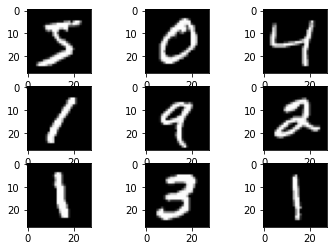

In [ ]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

Делаем данные черно-белыми.

In [ ]:
def to_bw(image):
  for i in range(0, image.shape[0]):
    for j in range(0, image.shape[1]):
      if image[i][j] != 0:
        image[i][j] = 1

In [ ]:
(X_train_bw, y_train_bw), (X_test_bw, y_test_bw) = mnist.load_data()

for i in range(0, X_train_bw.shape[0]):
  to_bw(X_train_bw[i])

for i in range(0, X_test_bw.shape[0]):
  to_bw(X_test_bw[i])

Отображаем черно-белые данные.

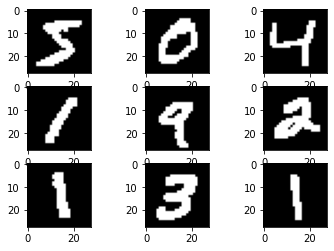

In [ ]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train_bw[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
# to one dim arrays

X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

X_train_bw = X_train_bw.reshape(60000, 28 * 28)
X_test_bw = X_test_bw.reshape(X_test_bw.shape[0], 28 * 28)

X_train.shape
X_train_bw.shape

(60000, 784)

In [ ]:
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt 

In [ ]:
def predict_on_images(X_train, y_train, X_test, y_test, dist_func, klimit):
  kVals = np.arange(3, klimit, 2)
  accuracies = []
  
  for k in kVals:
    model = KNN(K = k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test, dist_func)
    acc = log_loss(y_test, pred)
    accuracies.append(acc)
    print("K = " + str(k) + "; LOGLOSS: " + str(acc))

  plt.plot(kVals, accuracies) 
  plt.xlabel("K Value") 
  plt.ylabel("LogLoss")

In [ ]:
train_start = 5000
train_limit = 10000
test_limit = 100
klimit = 20

In [ ]:
def predict_for_all_norms(X_train_local, y_train_local, X_test_local, y_test_local):
  predict_on_images(X_train_local[train_start:train_limit], y_train_local[train_start:train_limit], X_test_local[0:test_limit], y_test_local[0:test_limit], abs_dist, klimit)
  predict_on_images(X_train_local[train_start:train_limit], y_train_local[train_start:train_limit], X_test_local[0:test_limit], y_test_local[0:test_limit], euc_dist, klimit)

Предсказываем на тестовой выборке с градациями серого с обеими нормами. K меняется до 20-ти. Норма - сумма модулей показывает себя лучше, чем евклидова.

K = 3; LOGLOSS: 4.733570135547119
K = 5; LOGLOSS: 3.7547611896658686
K = 7; LOGLOSS: 3.4625645430252576
K = 9; LOGLOSS: 2.8496700655654554
K = 11; LOGLOSS: 2.2202384529945873
K = 13; LOGLOSS: 1.9142355243369393
K = 15; LOGLOSS: 1.9252716166048949
K = 17; LOGLOSS: 1.9431624925306488
K = 19; LOGLOSS: 1.9592687284118466
K = 3; LOGLOSS: 20.623106267573988
K = 5; LOGLOSS: 17.08691921388852
K = 7; LOGLOSS: 13.557368884443884
K = 9; LOGLOSS: 11.924930820071348
K = 11; LOGLOSS: 10.048659873577094
K = 13; LOGLOSS: 8.47476115183251
K = 15; LOGLOSS: 8.180175529381081
K = 17; LOGLOSS: 6.618135077417161
K = 19; LOGLOSS: 6.338236711811691


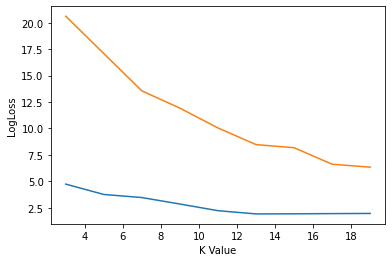

In [ ]:
predict_for_all_norms(X_train, y_train, X_test, y_test)

Предсказываем на тестовой выборке с черно белыми картинками с обеими нормами. K меняется до 20-ти. Норма - сумма модулей показывает себя хуже, чем евклидова.

K = 3; LOGLOSS: 7.839183190364564
K = 5; LOGLOSS: 6.925995701924384
K = 7; LOGLOSS: 5.655485862274569
K = 9; LOGLOSS: 5.386756107343273
K = 11; LOGLOSS: 5.1020047001311974
K = 13; LOGLOSS: 5.134147574869322
K = 15; LOGLOSS: 4.834279370718305
K = 17; LOGLOSS: 4.839779371749054
K = 19; LOGLOSS: 4.843931453541434
K = 3; LOGLOSS: 1.1015588691560263
K = 5; LOGLOSS: 0.7755199587590826
K = 7; LOGLOSS: 0.8010609723451012
K = 9; LOGLOSS: 0.48774457748571726
K = 11; LOGLOSS: 0.4863374676580355
K = 13; LOGLOSS: 0.4999679955718024
K = 15; LOGLOSS: 0.5161747946447551
K = 17; LOGLOSS: 0.5267580841843966
K = 19; LOGLOSS: 0.5341493871577524


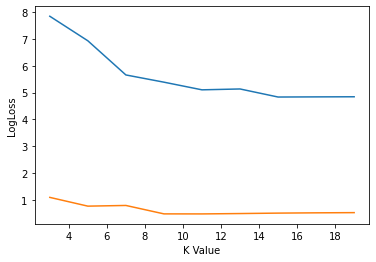

In [ ]:
predict_for_all_norms(X_train_bw, y_train_bw, X_test_bw, y_test_bw)

In [ ]:
import random

Функции зашумления пикселя для градаций серого и черного-белого изображения

In [ ]:
def grey_noise(pixel):
    res = random.randint(0, 255)
    while res == pixel:
        res = random.randint(0, 255)
    return res


def bw_noise(pixel):
    if pixel == 0:
        return 1
    else:
        return 0

Шумим либо всю картинку, либо частично. Область частичного зашумления - круг со случайным радиусом и центром. Шумим пиксель, если случайное значение меньше отсечки.

In [ ]:
def noise_image(image, probability, func):
    for x in range(image.shape[0]):
      if random.random() < probability:
        image[x] = func(image[x])


def noise_image_area(image, center, radius, probability, func):
    x_start = 0
    y_start = 0
    x_finish = 28
    y_finish = 28
    
    if center[0] - radius > 0:
        x_start = center[0] - radius
    if center[1] - radius > 0:
        y_start = center[1] - radius
    if center[0] + radius < 28:
        x_finish = center[0] + radius
    if center[1] + radius < 28:
        y_finish = center[1] + radius

    for x in range(x_start, x_finish):
        for y in range(y_start, y_finish):
            if random.random() < probability:
                image[x * 28 + y] = func(x * 28 + y)


def noise_images(images, prob, noise_func):
  for i in range(0, images.shape[0]):
    noise_image(images[i], prob, noise_func)


def noise_images_area(images, prob, noise_func):
  for i in range(0, images.shape[0]):
    noise_image_area(images[i], (random.randint(0, 27), random.randint(0, 27)), random.randint(2, 7), prob, noise_func)

  
def show_images(images):
  images = images.copy().reshape(len(images), 28, 28)
  from matplotlib import pyplot
  for i in range(min(9, len(images))):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(images[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [ ]:
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

X_train_bw_orig = X_train_bw.copy()
X_test_bw_orig = X_test_bw.copy()

In [ ]:
# noise grey images
noise_images(X_train, 0.3, grey_noise)
noise_images(X_test, 0.3, grey_noise)

In [ ]:
# noise bw images
noise_images(X_train_bw, 0.3, bw_noise)
noise_images(X_test_bw, 0.3, bw_noise)

Примеры полностью зашумленных изображений для градаций серого и черно-белых.

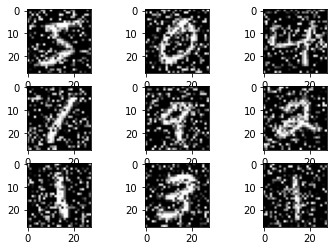

In [ ]:
show_images(X_train)

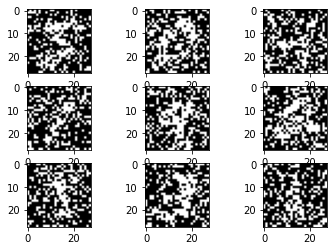

In [ ]:
show_images(X_train_bw)

Предсказываем на тестовой выборке с полностью зашумленными картинками с градациями серого с обеими нормами. K меняется до 20-ти. Норма - сумма модулей так же показывает себя лучше, чем евклидова. Точность предсказания заметно ниже, чем у не зашумленных.

K = 3; LOGLOSS: 10.679844832509362
K = 5; LOGLOSS: 6.7868145395591055
K = 7; LOGLOSS: 5.1963642905881136
K = 9; LOGLOSS: 4.929113884901725
K = 11; LOGLOSS: 4.305356514030733
K = 13; LOGLOSS: 3.990856623209727
K = 15; LOGLOSS: 3.990711598524133
K = 17; LOGLOSS: 3.369250316690143
K = 19; LOGLOSS: 2.4161381361051406
K = 3; LOGLOSS: 19.410401706158858
K = 5; LOGLOSS: 15.543712871050161
K = 7; LOGLOSS: 12.671565835234603
K = 9; LOGLOSS: 9.834918828847247
K = 11; LOGLOSS: 9.201209031407991
K = 13; LOGLOSS: 7.927287647822641
K = 15; LOGLOSS: 6.391127978259602
K = 17; LOGLOSS: 6.113564633587045
K = 19; LOGLOSS: 4.859989047652763


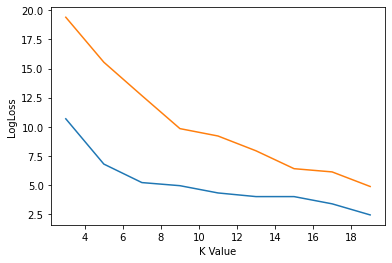

In [ ]:
predict_for_all_norms(X_train, y_train, X_test, y_test)

Предсказываем на тестовой выборке с полностью зашумленными черно-белыми картинками с обеими нормами. K меняется до 20-ти. Норма - сумма модулей так же показывает себя хуже, чем евклидова. Точность предсказания заметно ниже, чем у не зашумленных.

K = 3; LOGLOSS: 26.712828355110208
K = 5; LOGLOSS: 23.767720305349073
K = 7; LOGLOSS: 20.560973228688535
K = 9; LOGLOSS: 18.311699825723057
K = 11; LOGLOSS: 16.41458290099349
K = 13; LOGLOSS: 14.846843637732338
K = 15; LOGLOSS: 13.928109667011283
K = 17; LOGLOSS: 11.994845094259203
K = 19; LOGLOSS: 10.754490097452354
K = 3; LOGLOSS: 15.518150348521372
K = 5; LOGLOSS: 10.672010200191007
K = 7; LOGLOSS: 7.810293795168251
K = 9; LOGLOSS: 5.575267751343197
K = 11; LOGLOSS: 4.309975932117286
K = 13; LOGLOSS: 3.3878520901046603
K = 15; LOGLOSS: 3.0418585876667033
K = 17; LOGLOSS: 2.7316039367932348
K = 19; LOGLOSS: 2.424721819506633


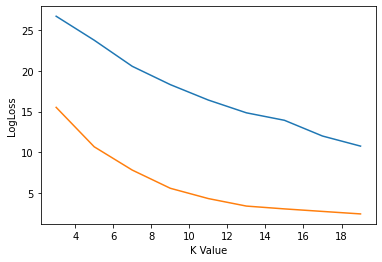

In [ ]:
predict_for_all_norms(X_train_bw, y_train_bw, X_test_bw, y_test_bw)

In [ ]:
X_train = X_train_orig.copy()
X_test = X_test_orig.copy()

X_train_bw = X_train_bw_orig.copy()
X_test_bw = X_test_bw_orig.copy()

In [ ]:
# noise grey images
noise_images_area(X_train, 0.3, grey_noise)
noise_images_area(X_test, 0.3, grey_noise)

In [ ]:
# noise bw images
noise_images_area(X_train_bw, 0.3, bw_noise)
noise_images_area(X_test_bw, 0.3, bw_noise)

Примеры неравномерно зашумленных изображений для градаций серого и черно-белых.

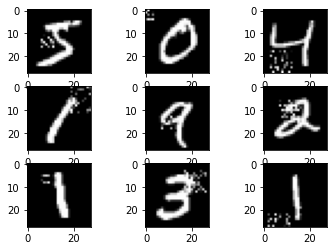

In [ ]:
show_images(X_train)

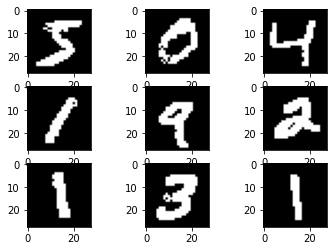

In [ ]:
show_images(X_train_bw)

Предсказываем на тестовой выборке с неравномерно зашумленными картинками с градациями серого с обеими нормами. K меняется до 20-ти. Норма - сумма модулей так же показывает себя лучше, чем евклидова. Точность предсказания заметно ниже, чем у не зашумленных и сравнимо с полностью зашумленными.

K = 3; LOGLOSS: 6.088573134477713
K = 5; LOGLOSS: 4.821935409405307
K = 7; LOGLOSS: 4.208024114780207
K = 9; LOGLOSS: 3.5697462458540357
K = 11; LOGLOSS: 3.2652767368799207
K = 13; LOGLOSS: 2.9673906004177333
K = 15; LOGLOSS: 2.657425111442285
K = 17; LOGLOSS: 2.684301283284457
K = 19; LOGLOSS: 2.3777521100215147
K = 3; LOGLOSS: 21.984384067965003
K = 5; LOGLOSS: 19.74424531393754
K = 7; LOGLOSS: 16.867325279509718
K = 9; LOGLOSS: 15.284302971802726
K = 11; LOGLOSS: 11.823513827566181
K = 13; LOGLOSS: 10.563755709191787
K = 15; LOGLOSS: 8.986522730879596
K = 17; LOGLOSS: 8.358242953065032
K = 19; LOGLOSS: 8.039574908217881


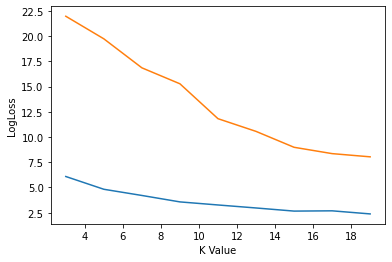

In [ ]:
predict_for_all_norms(X_train, y_train, X_test, y_test)

Предсказываем на тестовой выборке с неравномерно зашумленными черно-белыми картинками с обеими нормами. K меняется до 20-ти. Норма - сумма модулей так же показывает себя хуже, чем евклидова. Точность предсказания несколько ниже, чем у не зашумленных и лучше с полностью зашумленными.

K = 3; LOGLOSS: 11.25029416866547
K = 5; LOGLOSS: 9.325839284354895
K = 7; LOGLOSS: 8.047569841723028
K = 9; LOGLOSS: 7.748719234864358
K = 11; LOGLOSS: 7.4691280995239415
K = 13; LOGLOSS: 7.1720000211482855
K = 15; LOGLOSS: 6.535288065133142
K = 17; LOGLOSS: 6.545122058870587
K = 19; LOGLOSS: 5.618804025357003
K = 3; LOGLOSS: 1.1194764638483066
K = 5; LOGLOSS: 0.7920225578286261
K = 7; LOGLOSS: 0.8266041333567027
K = 9; LOGLOSS: 0.8382073393027883
K = 11; LOGLOSS: 0.5248270114986161
K = 13; LOGLOSS: 0.5428931427849588
K = 15; LOGLOSS: 0.5445515230078479
K = 17; LOGLOSS: 0.5574454384049491
K = 19; LOGLOSS: 0.5748451310675827


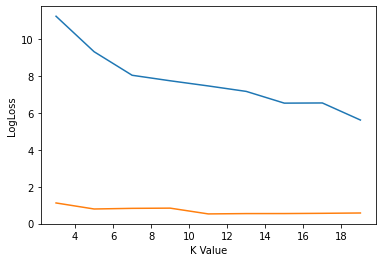

In [ ]:
predict_for_all_norms(X_train_bw, y_train_bw, X_test_bw, y_test_bw)

Odin

In [ ]:
X_train_orig.shape

(60000, 784)

In [ ]:
def odin(images, distf, outcasts, limit=4, num_occurences=1):
  candidates = []
  
  for img in images:
    tmp_list = images.copy()
    tmp_list.remove(img)
    tmp_list.sort(key=lambda img1: distf(np.array(img), np.array(img1)))
    candidates.append(tmp_list[:limit])
    
    merged_candidates = []
    for img_list in candidates:
      for img in img_list:
        merged_candidates.append(img)
    
  result = 0
  for img in images:
    if merged_candidates.count(img) <= num_occurences:
      outcasts.append(img)
      result += 1
    
  return result

Сколько выбросов в выборке:

In [ ]:
X_train_noised = X_train_orig.copy()

In [ ]:
noise_images(X_train_noised, 0.3, grey_noise)

In [ ]:
test_set = X_train_orig[1000:2000].tolist().copy()

In [ ]:
outcasts = []
odin(test_set, euc_dist, outcasts, 100, 10)

4

Как эти выбросы выглядят:

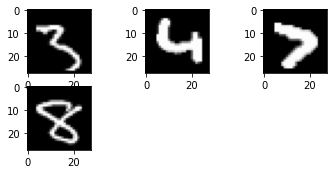

In [ ]:
show_images(np.array(outcasts))

Выброс - черный квадрат

In [ ]:
test_set.append([255] * 784)

In [ ]:
outcasts = []
odin(test_set, euc_dist, outcasts, 100, 10)

5

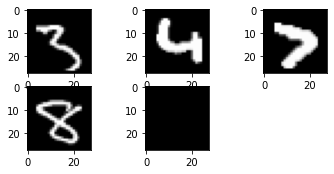

In [ ]:
show_images(np.array(outcasts))

Увеличим порог срабатывания:

In [ ]:
outcasts = []
odin(test_set, euc_dist, outcasts, 100, 20)

24

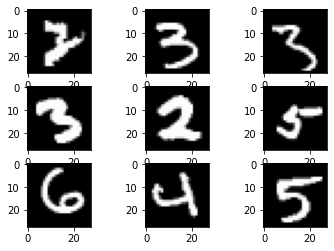

In [ ]:
show_images(np.array(outcasts))

Выбросы - зашумленные изображения.

In [ ]:
test_set.extend(X_train_noised[1000:1050].tolist())

In [ ]:
outcasts = []
odin(test_set, euc_dist, outcasts, 100, 20)

71